# Clase 13: Proyecto Ejemplo de Dibujo de Grafos por Fuerzas con OOP

-   **Autor**: [Dr. Mario Abarca](https://www.knkillname.org/)
-   **Objetivo**: Ilustrar la aplicación de la Programación Orientada a Objetos (OOP) y otros conceptos del curso en un proyecto integrador: una simulación de dibujo de grafos dirigido por fuerzas, que sirva como modelo y guía para los proyectos finales de los estudiantes.

<a href="https://colab.research.google.com/github/knkillname/uaem.notas.introcomp/blob/master/cuadernos/13.EjemplodeProyectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hoy nos sumergiremos de lleno en el desarrollo de un proyecto de ejemplo: una simulación para dibujar grafos de forma *bonita* usando fuerzas de atracción y repulsión. El objetivo es que vean en acción cómo los conceptos que hemos aprendido, especialmente la Programación Orientada a Objetos (OOP), se unen para crear algo interesante y visual, y que esto les sirva de inspiración y guía para sus propios proyectos finales.

## 1. Introducción al Proyecto: Dibujo de Grafos por Fuerzas

La visualización de grafos es fundamental en muchas áreas. Un grafo bien dibujado puede revelar patrones, clústeres y la estructura general de las relaciones que representa. El **dibujo de grafos dirigido por fuerzas** es una técnica popular que utiliza una analogía física para lograr disposiciones estéticas.

**La Idea Intuitiva: Nodos como Partículas, Aristas como Resortes**

Imagina que los nodos (o vértices) de un grafo son pequeñas partículas cargadas eléctricamente que se repelen entre sí. Si estuvieran sueltas, se alejarían unas de otras lo más posible. Ahora, imagina que las aristas (o enlaces) que conectan algunos de estos nodos son resortes. Estos resortes intentan mantener a los nodos que conectan a una "distancia ideal": si los nodos están muy separados, el resorte los jala para acercarlos; si están muy juntos, el resorte los empuja para separarlos (o, más comúnmente, la fuerza de atracción disminuye y la repulsión entre nodos domina).

El objetivo es encontrar una configuración de las posiciones de los nodos en un plano (usualmente 2D) donde este sistema de fuerzas esté en un estado de equilibrio (o cercano a él).

Este proyecto nos permitirá aplicar OOP para modelar los componentes del sistema y usar NumPy para cálculos vectoriales y Matplotlib para la visualización (conceptos de la [Clase 11: Cómputo Científico](https://github.com/knkillname/uaem.notas.introcomp/blob/master/cuadernos/11.C%C3%B3mputoCient%C3%ADfico.ipynb)).

## 2. Fundamentos del Algoritmo: Fuerzas y Proceso de Simulación

### 2.1. Las Fuerzas en Juego

En nuestro modelo simplificado, consideraremos dos tipos principales de fuerzas:

* **Fuerza de Repulsión ($F_r$)**:
    * Actúa entre **todos los pares** de nodos, independientemente de si están conectados por una arista o no.
    * Su propósito es evitar que los nodos se superpongan y distribuirlos en el espacio.
    * Es inversamente proporcional a la distancia entre los nodos. Una fórmula común, inspirada en la ley de Coulomb o el algoritmo de Fruchterman-Reingold, es:
        $F_r(u,v) = \frac{k_r^2}{d(u,v)}$
        donde $d(u,v)$ es la distancia euclidiana entre el nodo $u$ y el nodo $v$, y $k_r$ es una constante que representa la "fuerza" óptima de separación. La fuerza sobre el nodo $u$ debido a $v$ apunta en la dirección del vector $\vec{vu}$ (de $v$ hacia $u$).

* **Fuerza de Atracción ($F_a$)**:
    * Actúa **solo entre nodos que están conectados directamente por una arista**.
    * Su propósito es mantener los nodos conectados a una distancia razonable, como si estuvieran unidos por un resorte.
    * Una fórmula común, inspirada en la Ley de Hooke, es:
        $F_a(u,v) = k_a \cdot (d(u,v) - l_0)$
        donde $d(u,v)$ es la distancia actual entre los nodos $u$ y $v$, $l_0$ es la longitud ideal del "resorte" (arista), y $k_a$ es la constante de rigidez del resorte.
        * Si $d(u,v) > l_0$, la fuerza es positiva (atracción).
        * Si $d(u,v) < l_0$, la fuerza es negativa (repulsión del resorte).
        La fuerza sobre $u$ debido a la arista $(u,v)$ apunta en la dirección de $\vec{uv}$ si la magnitud es positiva.

### 2.2. El Proceso Iterativo de Simulación

El dibujo se logra mediante un proceso iterativo:

1.  **Inicialización**: Se asignan posiciones iniciales a los nodos (a menudo de forma aleatoria).
2.  **Cálculo de Fuerzas**: En cada iteración del algoritmo:
    * Para cada nodo, se inicializa su fuerza neta acumulada ($\vec{F}_{total}$) a un vector cero.
    * **Fuerzas de Repulsión**: Para cada par de nodos $(u, v)$, se calcula la fuerza de repulsión $\vec{F}_r(u,v)$. Esta fuerza se suma a $\vec{F}_{total,u}$ y su opuesta ($-\vec{F}_r(u,v)$, que es $\vec{F}_r(v,u)$) se suma a $\vec{F}_{total,v}$.
    * **Fuerzas de Atracción**: Para cada arista $(u,v)$ en el grafo, se calcula la fuerza de atracción $\vec{F}_a(u,v)$. Esta fuerza se suma a $\vec{F}_{total,u}$ y su opuesta se suma a $\vec{F}_{total,v}$. (Nota: la dirección de aplicación depende de si el resorte está estirado o comprimido).
3.  **Actualización de Posiciones**: Una vez que se han calculado todas las fuerzas y sumado a $\vec{F}_{total}$ para cada nodo, la posición de cada nodo $\vec{p}$ se actualiza:
    $\vec{p}_{nuevo} = \vec{p}_{viejo} + \Delta \vec{p}$
    donde el desplazamiento $\Delta \vec{p}$ es proporcional a la fuerza neta sobre el nodo:
    $\Delta \vec{p} = \vec{F}_{total} \cdot \delta$
    El parámetro $\delta$ es un factor de movimiento, a menudo llamado "temperatura" en algunos algoritmos. Este factor puede disminuir gradualmente con cada iteración (un proceso de "enfriamiento"), lo que ayuda al sistema a converger más suavemente hacia un estado de equilibrio.
4.  **Repetición**: Los pasos 2 (Cálculo de Fuerzas) y 3 (Actualización de Posiciones) se repiten durante un número predefinido de iteraciones, o hasta que los movimientos de los nodos sean suficientemente pequeños (indicando que el sistema se ha estabilizado).

Este ciclo de calcular fuerzas y mover nodos permite que el grafo "se relaje" en una configuración que idealmente minimiza la "energía" del sistema, resultando en un dibujo claro.

## 3. Diseño OOP, Pseudocódigo y Análisis de Complejidad

### 3.1. Diseño Orientado a Objetos (OOP) para la Simulación

Aplicaremos OOP (como en la [Clase 8](https://github.com/knkillname/uaem.notas.introcomp/blob/master/cuadernos/8.ProgramacionOrientadaAObjetos.ipynb)) para modelar nuestro sistema.

#### 3.1.1. Identificación de Clases y Responsabilidades

* **Clase `Nodo`**:
    * **Responsabilidad**: Representar un vértice, su posición y las fuerzas que actúan sobre él.
    * **Atributos Clave**: `id`, `posicion` (vector NumPy), `fuerza_acumulada` (vector NumPy).
    * **Métodos Clave**: `__init__`, `aplicar_fuerza`, `actualizar_posicion`, `__str__`.

* **Clase `Arista`**:
    * **Responsabilidad**: Representar una conexión y calcular la fuerza de atracción que ejerce.
    * **Atributos Clave**: `nodo_origen`, `nodo_destino` (objetos `Nodo`), `longitud_ideal`, `k_atraccion`.
    * **Métodos Clave**: `__init__`, `calcular_y_aplicar_fuerza_atraccion`.

* **Clase `SimuladorGrafo`**:
    * **Responsabilidad**: Orquestar la simulación, gestionar nodos/aristas, calcular fuerzas globales y actualizar el sistema.
    * **Atributos Clave**: `nodos` (colección de Nodos), `aristas` (lista de Aristas), parámetros de simulación (`k_repulsion_base`, `k_optimo_distancia`, `factor_movimiento`, `factor_enfriamiento`).
    * **Métodos Clave**: `__init__`, `agregar_nodo`, `agregar_arista`, `_calcular_fuerzas_repulsion_global`, `_calcular_fuerzas_atraccion_aristas`, `_actualizar_posiciones_nodos`, `paso_simulacion`, `dibujar`.

### 3.2. Pseudocódigo del Algoritmo de Simulación

El corazón del algoritmo reside en el método `paso_simulacion` de la clase `SimuladorGrafo`.

```plaintext
ALGORITMO PasoSimulacion(simulador):
  // Parte 1: Calcular Fuerzas de Repulsión
  // (Resetear fuerza_acumulada en cada nodo implícitamente o al inicio del paso)

  PARA CADA par_no_ordenado (nodo_u, nodo_v) DE simulador.nodos:
    vector_distancia = nodo_u.posicion - nodo_v.posicion
    distancia = norma(vector_distancia)
    SI distancia > 0 ENTONCES:
      fuerza_rep_magnitud = (simulador.k_optimo_distancia^2) / distancia // Fórmula F-R
      fuerza_rep_vector = (vector_distancia / distancia) * fuerza_rep_magnitud * simulador.k_repulsion_base
      nodo_u.aplicar_fuerza(fuerza_rep_vector)
      nodo_v.aplicar_fuerza(-fuerza_rep_vector)
    SINO (nodos superpuestos):
      fuerza_aleatoria = VectorAleatorioPequeño() // Para separarlos
      nodo_u.aplicar_fuerza(fuerza_aleatoria)
      nodo_v.aplicar_fuerza(-fuerza_aleatoria)
    FIN SI
  FIN PARA

  // Parte 2: Calcular Fuerzas de Atracción
  PARA CADA arista EN simulador.aristas:
    arista.calcular_y_aplicar_fuerza_atraccion() 
  FIN PARA

  // Parte 3: Actualizar Posiciones de los Nodos
  PARA CADA nodo EN simulador.nodos:
    nodo.actualizar_posicion(simulador.factor_movimiento)
  FIN PARA

  // Parte 4: Enfriamiento
  simulador.factor_movimiento = simulador.factor_movimiento * simulador.factor_enfriamiento
FIN ALGORITMO
```
Este pseudocódigo describe una iteración. El proceso completo implicaría llamar a `PasoSimulacion` repetidamente.

### 3.3. Análisis de Complejidad (por iteración)

Sea $V$ el número de nodos y $E$ el número de aristas en el grafo.

* **Cálculo de Fuerzas de Repulsión (`_calcular_fuerzas_repulsion_global`)**:
    * Se itera sobre todos los pares posibles de nodos. Hay $\binom{V}{2} = \frac{V(V-1)}{2}$ pares.
    * Para cada par, se realizan operaciones de costo constante (resta de vectores, norma, división, multiplicación, suma de vectores).
    * Por lo tanto, la complejidad de esta parte es $O(V^2)$.

* **Cálculo de Fuerzas de Atracción (`_calcular_fuerzas_atraccion_aristas`)**:
    * Se itera sobre todas las $E$ aristas.
    * Para cada arista, el método `calcular_y_aplicar_fuerza_atraccion` realiza operaciones de costo constante.
    * Por lo tanto, la complejidad de esta parte es $O(E)$.

* **Actualización de Posiciones de los Nodos (`_actualizar_posiciones_nodos`)**:
    * Se itera sobre todos los $V$ nodos.
    * Para cada nodo, el método `actualizar_posicion` realiza operaciones de costo constante.
    * Por lo tanto, la complejidad de esta parte es $O(V)$.

* **Enfriamiento**: Es una operación de costo constante, $O(1)$.

**Complejidad Total por Iteración del `paso_simulacion`**:
La complejidad total de una sola iteración del algoritmo es la suma de las complejidades de sus partes, dominada por el término más grande:
$O(V^2 + E + V) = O(V^2 + E)$.

En grafos densos, $E$ puede ser del orden de $O(V^2)$, por lo que la complejidad sería $O(V^2)$. En grafos dispersos, $E$ es del orden de $O(V)$, y la complejidad seguiría siendo $O(V^2)$ debido al cálculo de repulsión global.

Si se realizan $I$ iteraciones, la complejidad total del algoritmo de dibujo sería $O(I \cdot (V^2 + E))$.

**Consideraciones Espaciales**:
* Se almacenan $V$ nodos y $E$ aristas.
* Cada nodo almacena su posición y fuerza acumulada (vectores 2D, espacio constante por nodo).
* Cada arista almacena referencias a dos nodos y algunas constantes (espacio constante por arista).
* Por lo tanto, la complejidad espacial principal es $O(V + E)$ para almacenar la estructura del grafo y el estado de la simulación.

Este análisis es para la versión "ingenua" del cálculo de repulsión. Existen técnicas más avanzadas (como el algoritmo de Barnes-Hut o el uso de Quadtrees/Octrees) que pueden reducir la complejidad del cálculo de repulsión a aproximadamente $O(V \log V)$ en promedio, haciendo que la complejidad total por iteración sea más cercana a $O(V \log V + E)$. Sin embargo, estas optimizaciones están fuera del alcance de este proyecto de ejemplo introductorio.

## 4. Implementación en Python de las Clases del Grafo

A continuación, se presenta el código Python para cada clase, dividido en bloques más pequeños para facilitar su comprensión y ejecución en un entorno como Google Colab.

### 4.1. Importaciones Necesarias

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
# Para animación interactiva en Colab:
from IPython.display import display, clear_output
import time 

### 4.2. Clase `Nodo`

#### 4.2.1. Definición de la Clase `Nodo`

In [4]:
class Nodo:
    def __init__(self, id_nodo, x_inicial, y_inicial):
        self.id = id_nodo
        self.posicion = np.array([float(x_inicial), float(y_inicial)])
        self.fuerza_acumulada = np.zeros(2) # [fx, fy]

    def aplicar_fuerza(self, vector_fuerza):
        self.fuerza_acumulada += vector_fuerza

    def actualizar_posicion(self, factor_movimiento_maximo):
        magnitud_fuerza = np.linalg.norm(self.fuerza_acumulada)
        if magnitud_fuerza > 0: 
            desplazamiento = (self.fuerza_acumulada / magnitud_fuerza) * min(magnitud_fuerza, factor_movimiento_maximo)
            self.posicion += desplazamiento
        self.fuerza_acumulada = np.zeros(2) # Resetear fuerzas para la siguiente iteración

    def __str__(self):
        return f"Nodo({self.id}, Pos: [{self.posicion[0]:.2f}, {self.posicion[1]:.2f}])"

    def __repr__(self):
        return self.__str__()

#### 4.2.2. Ejemplo de Uso de `Nodo`

**Crear un nodo:**

In [5]:
nodo_A_ej = Nodo("NodoA", 1.0, 2.0)
nodo_A_ej 

Nodo(NodoA, Pos: [1.00, 2.00])

**Aplicar una fuerza:**

In [6]:
fuerza_1_ej = np.array([1.0, -0.5])
nodo_A_ej.aplicar_fuerza(fuerza_1_ej)
nodo_A_ej.fuerza_acumulada

array([ 1. , -0.5])

**Aplicar otra fuerza:**

In [7]:
fuerza_2_ej = np.array([-0.3, 0.7])
nodo_A_ej.aplicar_fuerza(fuerza_2_ej)
nodo_A_ej.fuerza_acumulada

array([0.7, 0.2])

**Actualizar posición:**

In [8]:
factor_desplazamiento_ej = 0.1
print(f"Posición de {nodo_A_ej.id} (antes de actualizar): {nodo_A_ej.posicion}")
nodo_A_ej.actualizar_posicion(factor_desplazamiento_ej)
print(f"Posición de {nodo_A_ej.id} (después de actualizar): {nodo_A_ej.posicion}")
print(f"Fuerza acumulada en {nodo_A_ej.id} (después de actualizar): {nodo_A_ej.fuerza_acumulada}")
nodo_A_ej

Posición de NodoA (antes de actualizar): [1. 2.]
Posición de NodoA (después de actualizar): [1.09615239 2.02747211]
Fuerza acumulada en NodoA (después de actualizar): [0. 0.]


Nodo(NodoA, Pos: [1.10, 2.03])

### 4.3. Clase `Arista`

#### 4.3.1. Definición de la Clase `Arista`

In [9]:
class Arista:
    def __init__(self, nodo_origen, nodo_destino, longitud_ideal=1.5, k_atraccion=0.05):
        # nodo_origen y nodo_destino son objetos de la clase Nodo
        self.nodo_origen = nodo_origen
        self.nodo_destino = nodo_destino
        self.longitud_ideal = longitud_ideal
        self.k_atraccion = k_atraccion # Constante del "resorte"

    def calcular_y_aplicar_fuerza_atraccion(self):
        vector_direccion = self.nodo_destino.posicion - self.nodo_origen.posicion
        distancia_actual = np.linalg.norm(vector_direccion)

        if distancia_actual == 0: # Nodos superpuestos, evitar división por cero
            return

        # Fuerza de resorte (Ley de Hooke): F = k * (distancia_actual - longitud_ideal)
        fuerza_magnitud = self.k_atraccion * (distancia_actual - self.longitud_ideal)
        
        direccion_normalizada = vector_direccion / distancia_actual
        fuerza_vectorial = direccion_normalizada * fuerza_magnitud
        
        self.nodo_origen.aplicar_fuerza(fuerza_vectorial)
        self.nodo_destino.aplicar_fuerza(-fuerza_vectorial) # Fuerza opuesta

    def __str__(self):
        return f"Arista({self.nodo_origen.id} - {self.nodo_destino.id})"
    
    def __repr__(self):
        return self.__str__()

#### 4.3.2. Ejemplo de Uso de `Arista`

**Crear nodos y arista:**

In [10]:
nodo_P_ej = Nodo("P", 0.0, 0.0)
nodo_Q_ej = Nodo("Q", 3.0, 4.0) # Distancia inicial es 5
# Supongamos longitud_ideal = 3.0 y k_atraccion = 0.1
arista_PQ_ej = Arista(nodo_P_ej, nodo_Q_ej, longitud_ideal=3.0, k_atraccion=0.1)

print(f"Nodo inicial P: {nodo_P_ej}")
print(f"Nodo inicial Q: {nodo_Q_ej}")
print(f"Arista creada: {arista_PQ_ej}")

Nodo inicial P: Nodo(P, Pos: [0.00, 0.00])
Nodo inicial Q: Nodo(Q, Pos: [3.00, 4.00])
Arista creada: Arista(P - Q)


**Calcular y aplicar fuerza de atracción:**

In [11]:
print(f"Fuerza en Nodo P (antes de atracción): {nodo_P_ej.fuerza_acumulada}")
print(f"Fuerza en Nodo Q (antes de atracción): {nodo_Q_ej.fuerza_acumulada}")

arista_PQ_ej.calcular_y_aplicar_fuerza_atraccion()

# Explicación del cálculo de la fuerza aplicada:
# Distancia actual entre P y Q es 5.0. Longitud ideal es 3.0. k_atraccion es 0.1.
# Magnitud de la fuerza: 0.1 * (5.0 - 3.0) = 0.2.
# Dirección normalizada de P hacia Q: (3/5, 4/5) = (0.6, 0.8).
# Fuerza vectorial sobre P (hacia Q): 0.2 * (0.6, 0.8) = (0.12, 0.16).
# Fuerza vectorial sobre Q (hacia P): - (0.12, 0.16) = (-0.12, -0.16).
print(f"Fuerza en Nodo P (después de atracción): {nodo_P_ej.fuerza_acumulada}") 
print(f"Fuerza en Nodo Q (después de atracción): {nodo_Q_ej.fuerza_acumulada}")

Fuerza en Nodo P (antes de atracción): [0. 0.]
Fuerza en Nodo Q (antes de atracción): [0. 0.]
Fuerza en Nodo P (después de atracción): [0.12 0.16]
Fuerza en Nodo Q (después de atracción): [-0.12 -0.16]


### 4.4. Clase `SimuladorGrafo`

#### 4.4.1. Definición de la Clase `SimuladorGrafo`

In [ ]:
class SimuladorGrafo:
    def __init__(self, k_repulsion_base=0.1, factor_movimiento_inicial=0.1, factor_enfriamiento=0.99, area_total_dibujo=10.0):
        self.nodos = {} # Usaremos un diccionario para acceder a nodos por ID fácilmente
        self.aristas = []
        self.k_repulsion_base = k_repulsion_base # Factor base para la repulsión
        self.factor_movimiento = factor_movimiento_inicial
        self.factor_enfriamiento = factor_enfriamiento
        self.area_total_dibujo = area_total_dibujo
        self.k_optimo_distancia = 1.0 # Distancia óptima entre nodos, se calcula después

    def agregar_nodo(self, id_nodo, x_inicial=None, y_inicial=None):
        if x_inicial is None: # Posiciones aleatorias si no se especifican
            x_inicial = (np.random.rand() - 0.5) * self.area_total_dibujo * 0.5
        if y_inicial is None:
            y_inicial = (np.random.rand() - 0.5) * self.area_total_dibujo * 0.5
        
        if id_nodo not in self.nodos:
            nodo = Nodo(id_nodo, x_inicial, y_inicial)
            self.nodos[id_nodo] = nodo
            # Recalcular k_optimo_distancia basado en el número de nodos (Fruchterman-Reingold)
            if len(self.nodos) > 0:
                 self.k_optimo_distancia = math.sqrt( (self.area_total_dibujo**2) / len(self.nodos) )
            return nodo
        return self.nodos[id_nodo] # Retorna el nodo existente si el ID ya estaba

    def agregar_arista(self, id_nodo1, id_nodo2, longitud_ideal=None, k_atraccion=0.02):
        if id_nodo1 in self.nodos and id_nodo2 in self.nodos:
            nodo1 = self.nodos[id_nodo1]
            nodo2 = self.nodos[id_nodo2]
            
            if longitud_ideal is None: # Usar k_optimo_distancia como longitud ideal para aristas
                longitud_ideal = self.k_optimo_distancia 
            
            arista = Arista(nodo1, nodo2, longitud_ideal, k_atraccion)
            self.aristas.append(arista)
            return arista
        else:
            raise ValueError(f"Uno o ambos nodos ({id_nodo1}, {id_nodo2}) no existen en el grafo.")

    def _calcular_fuerzas_repulsion(self):
        lista_nodos_obj = list(self.nodos.values())
        for i in range(len(lista_nodos_obj)):
            for j in range(i + 1, len(lista_nodos_obj)): # Evitar pares duplicados y auto-repulsión
                nodo1 = lista_nodos_obj[i]
                nodo2 = lista_nodos_obj[j]
                
                vector_direccion = nodo1.posicion - nodo2.posicion
                distancia = np.linalg.norm(vector_direccion)
                
                if distancia == 0: # Nodos superpuestos
                    fuerza_vectorial_rep = (np.random.rand(2) - 0.5) * 0.01 
                else:
                    fuerza_magnitud_rep = self.k_repulsion_base * (self.k_optimo_distancia**2) / distancia
                    direccion_normalizada_rep = vector_direccion / distancia
                    fuerza_vectorial_rep = direccion_normalizada_rep * fuerza_magnitud_rep
                
                nodo1.aplicar_fuerza(fuerza_vectorial_rep)
                nodo2.aplicar_fuerza(-fuerza_vectorial_rep) # Fuerza opuesta

    def _calcular_fuerzas_atraccion(self):
        for arista in self.aristas:
            arista.calcular_y_aplicar_fuerza_atraccion()

    def _actualizar_posiciones_nodos(self):
        for nodo in self.nodos.values():
            nodo.actualizar_posicion(self.factor_movimiento)

    def paso_simulacion(self):
        self._calcular_fuerzas_repulsion()
        self._calcular_fuerzas_atraccion()
        self._actualizar_posiciones_nodos()
        self.factor_movimiento *= self.factor_enfriamiento

    def dibujar(self, titulo_iteracion='', ax=None, clear_ax=True):
        standalone_plot = ax is None # Determina si se debe crear una figura o usar una existente
        if standalone_plot:
            # Si no se proporciona un 'ax', crea una nueva figura y eje.
            fig, ax = plt.subplots(figsize=(8, 8)) # Ajustar tamaño según necesidad
        
        if clear_ax:
            ax.clear() # Limpiar el eje para la nueva iteración
        
        # Dibujar aristas primero para que estén detrás de los nodos
        for arista in self.aristas:
            pos_origen = arista.nodo_origen.posicion
            pos_destino = arista.nodo_destino.posicion
            ax.plot([pos_origen[0], pos_destino[0]], 
                    [pos_origen[1], pos_destino[1]], 
                    'k-', alpha=0.3, zorder=1) # Líneas negras semitransparentes

        # Dibujar nodos
        if self.nodos: # Solo si hay nodos
            x_coords = [nodo.posicion[0] for nodo in self.nodos.values()]
            y_coords = [nodo.posicion[1] for nodo in self.nodos.values()]
            ax.scatter(x_coords, y_coords, s=300, c='skyblue', edgecolors='black', zorder=2, alpha=0.8)
            
            # Etiquetar nodos
            for nodo_id, nodo_obj in self.nodos.items():
                ax.text(nodo_obj.posicion[0], nodo_obj.posicion[1], str(nodo_id), 
                        ha='center', va='center', fontsize=9, color='black', zorder=3)
        
        ax.set_title(f"Dibujo de Grafo por Fuerzas - {titulo_iteracion}")
        ax.set_xticks([]) # Ocultar ejes
        ax.set_yticks([])
        
        # Establecer límites para centrar el grafo y evitar que se salga demasiado
        if self.nodos:
            all_x = [n.posicion[0] for n in self.nodos.values()]
            all_y = [n.posicion[1] for n in self.nodos.values()]
            if all_x and all_y: # Asegurarse de que no estén vacías
                min_x, max_x = min(all_x), max(all_x)
                min_y, max_y = min(all_y), max(all_y)
                padding_x = (max_x - min_x) * 0.15 if (max_x - min_x) > 1e-6 else 1.0
                padding_y = (max_y - min_y) * 0.15 if (max_y - min_y) > 1e-6 else 1.0
                ax.set_xlim([min_x - padding_x, max_x + padding_x])
                ax.set_ylim([min_y - padding_y, max_y + padding_y])
        else: # Límites por defecto si no hay nodos
             ax.set_xlim([-self.area_total_dibujo/2, self.area_total_dibujo/2])
             ax.set_ylim([-self.area_total_dibujo/2, self.area_total_dibujo/2])

        ax.set_aspect('equal', adjustable='box') # Mantener la proporción de aspecto
        
        # Solo llamar a plt.show() si la figura se creó dentro de este método
        if standalone_plot: 
            plt.show()

#### 4.4.2. Ejemplo de Uso de `SimuladorGrafo` (Básico)

**Crear un simulador y agregar elementos:**

In [13]:
sim_basico_ej = SimuladorGrafo(factor_movimiento_inicial=0.5, area_total_dibujo=5.0)

nodo_s1_ej = sim_basico_ej.agregar_nodo("S1", 0, 0)
nodo_s2_ej = sim_basico_ej.agregar_nodo("S2", 1, 1)
nodo_s3_ej = sim_basico_ej.agregar_nodo("S3", -1, 1)

arista1_ej = sim_basico_ej.agregar_arista("S1", "S2")
arista2_ej = sim_basico_ej.agregar_arista("S1", "S3")

**Mostrar información básica del simulador:**

In [14]:
print("Nodos en el simulador básico:")
for nid, n_obj in sim_basico_ej.nodos.items(): print(n_obj)
    
print("\nAristas en el simulador básico:")
for ar in sim_basico_ej.aristas: print(ar)
    
print(f"\nDistancia óptima k (básico): {sim_basico_ej.k_optimo_distancia:.2f}")

Nodos en el simulador básico:
Nodo(S1, Pos: [0.00, 0.00])
Nodo(S2, Pos: [1.00, 1.00])
Nodo(S3, Pos: [-1.00, 1.00])

Aristas en el simulador básico:
Arista(S1 - S2)
Arista(S1 - S3)

Distancia óptima k (básico): 2.89


**Dibujar el estado inicial:**

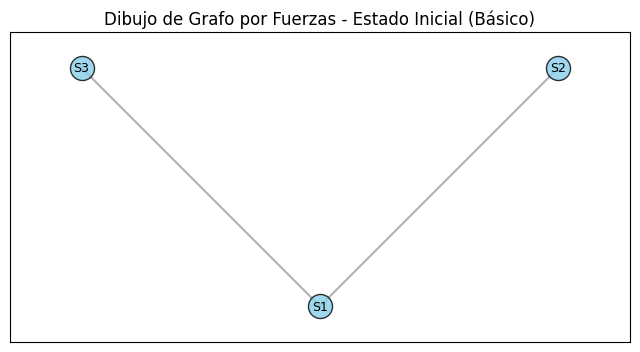

In [15]:
# La función dibujar llamará a plt.show() si no se le pasa un 'ax'
sim_basico_ej.dibujar("Estado Inicial (Básico)") 

**Realizar un paso de simulación y mostrar estado:**


Realizando un paso de simulación (básico)...

Nodos después de 1 paso (básico):
Nodo(S1, Pos: [0.00, -0.50])
Nodo(S2, Pos: [1.45, 1.23])
Nodo(S3, Pos: [-1.45, 1.23])
Factor de movimiento (básico): 0.495


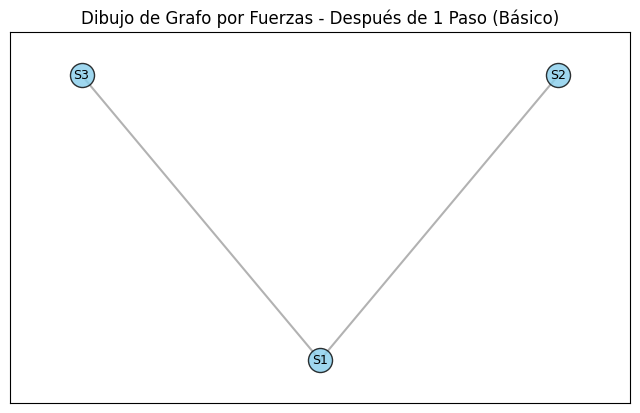

In [16]:
print("\nRealizando un paso de simulación (básico)...")
sim_basico_ej.paso_simulacion()

print("\nNodos después de 1 paso (básico):")
for n_id, n_obj in sim_basico_ej.nodos.items(): print(n_obj)
print(f"Factor de movimiento (básico): {sim_basico_ej.factor_movimiento:.3f}")

# Dibujar después de un paso
sim_basico_ej.dibujar("Después de 1 Paso (Básico)") 

## 5. Ejecución de la Simulación Completa y Visualización

Ahora creamos un grafo de ejemplo más completo y simulamos el proceso para ver el dibujo evolucionar.

**5.1. Crear el simulador y definir el grafo:**

In [24]:
simulador_completo = SimuladorGrafo(
    k_repulsion_base=0.2, 
    factor_movimiento_inicial=0.2, 
    factor_enfriamiento=0.99,
    area_total_dibujo=8.0
)

simulador_completo.agregar_nodo('A'); simulador_completo.agregar_nodo('B'); simulador_completo.agregar_nodo('C');
simulador_completo.agregar_nodo('D'); simulador_completo.agregar_nodo('E');

simulador_completo.agregar_arista('A', 'B', k_atraccion=0.03); simulador_completo.agregar_arista('B', 'C', k_atraccion=0.03);
simulador_completo.agregar_arista('C', 'D', k_atraccion=0.03); simulador_completo.agregar_arista('D', 'A', k_atraccion=0.03); # Ciclo
simulador_completo.agregar_arista('A', 'C', k_atraccion=0.01); simulador_completo.agregar_arista('B', 'D', k_atraccion=0.01); # Diagonales
simulador_completo.agregar_arista('E', 'A', k_atraccion=0.03); simulador_completo.agregar_arista('E', 'C', k_atraccion=0.03);

**5.2. Dibujar estado inicial:**

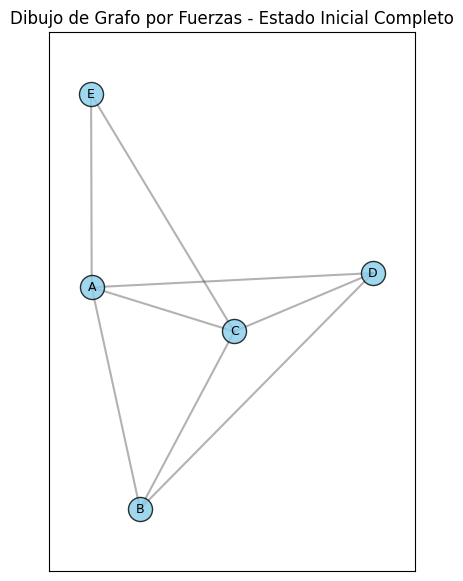

In [28]:
# Creamos la figura y el eje una vez para la "animación"
fig_anim, ax_anim = plt.subplots(figsize=(7, 7)) 
# Pasamos ax_anim a dibujar, y clear_ax=False para el primer dibujo para no borrar si ya había algo.
simulador_completo.dibujar(titulo_iteracion="Estado Inicial Completo", ax=ax_anim, clear_ax=False) 

**5.3. Ejecutar la simulación (bucle de iteraciones):**

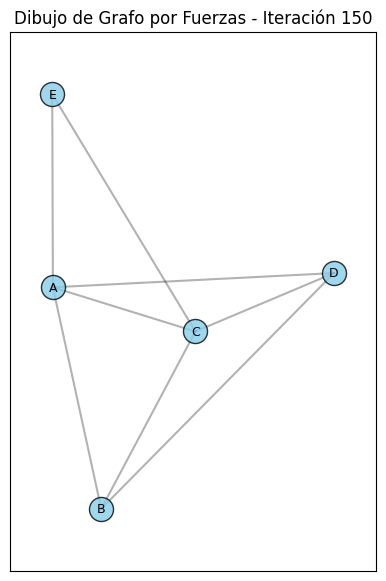

In [26]:
num_iteraciones = 150
print(f"k_optimo_distancia calculado para simulación completa: {simulador_completo.k_optimo_distancia:.2f}")

for i in range(num_iteraciones):
    simulador_completo.paso_simulacion()
    if (i + 1) % 10 == 0: # Redibujar cada 10 iteraciones
        clear_output(wait=True) # Limpiar la salida de la celda anterior
        simulador_completo.dibujar(titulo_iteracion=f"Iteración {i+1}", ax=ax_anim, clear_ax=True) # Reutilizar y limpiar el mismo eje
        display(fig_anim) # Mostrar la figura actualizada
        time.sleep(0.1) # Pequeña pausa para que se vea la actualización

**5.4. Dibujo final y estado de los nodos:**

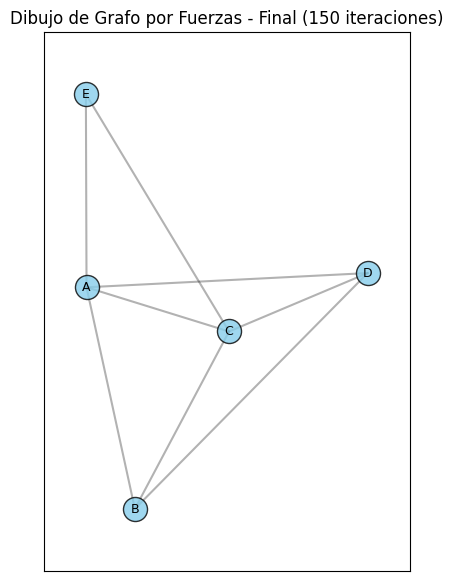


Factor de movimiento final: 0.0443
Estado final de los nodos:
Nodo(A, Pos: [-5.05, 1.67])
Nodo(B, Pos: [-2.28, -11.02])
Nodo(C, Pos: [3.11, -0.86])
Nodo(D, Pos: [11.05, 2.48])
Nodo(E, Pos: [-5.09, 12.72])


In [27]:
clear_output(wait=True) # Limpiar la última salida del bucle
simulador_completo.dibujar(titulo_iteracion=f"Final ({num_iteraciones} iteraciones)", ax=ax_anim, clear_ax=True)
display(fig_anim) # Mostrar la figura final

print(f"\nFactor de movimiento final: {simulador_completo.factor_movimiento:.4f}")
print("Estado final de los nodos:")
for nodo_id, nodo_obj in simulador_completo.nodos.items():
    print(nodo_obj)
plt.close(fig_anim) # Cerrar la figura para liberar memoria

**Nota sobre la animación en Colab/Jupyter:** El código ahora utiliza `IPython.display.clear_output(wait=True)` y `IPython.display.display(fig)` para crear una animación actualizando la misma figura en la celda. Esto es generalmente más robusto para Colab. Para animaciones más complejas o para exportar a video/GIF, se podría usar `matplotlib.animation.FuncAnimation`.

## 6. Análisis del Proyecto, Conexiones y Conclusión

### 6.1. Análisis del Proyecto y Conexión con la Rúbrica

Este proyecto ejemplo ilustra cómo aplicar los conceptos del curso. Su relación con la [Rúbrica de Evaluación del Proyecto Final](https://github.com/knkillname/uaem.notas.introcomp/blob/master/recursos/rubricaDeProyectoFinal.md) es:

1.  **Estructura y Presentación:** Este documento (o un cuaderno Jupyter) con introducción, lógica y código organizado. Gráficos Matplotlib y fórmulas LaTeX.
2.  **Contenido del Curso:**
    * **Fundamentos Python:** Variables, tipos, funciones (`math.sqrt`, `np.linalg.norm`).
    * **Iteración:** Ciclos `for` para nodos/aristas.
    * **Estructuras de Datos:** Listas, diccionarios.
    * **OOP:** Diseño basado en clases (`Nodo`, `Arista`, `SimuladorGrafo`).
    * **Algoritmia:** Simulación iterativa por pasos. Complejidad $O(V^2 + E)$ por iteración.
    * **Bibliotecas Científicas:** NumPy (vectores), Matplotlib (visualización).
3.  **Calidad Técnica y Originalidad:** Código comentado, explicaciones. Tema de física computacional/visualización. Reproducible.
4.  **Entrega y Cumplimiento:** Código ejecutable, celdas relevantes. Se podrían citar fuentes (ej. Fruchterman & Reingold, 1991).

### 6.2. Conclusión del Proyecto Ejemplo y Nota sobre Herramientas Existentes

Este proyecto demuestra cómo la OOP ayuda a estructurar simulaciones complejas de forma modular. Cada clase tiene responsabilidades claras, y `SimuladorGrafo` coordina las interacciones para el comportamiento emergente del dibujo. Al combinar OOP con NumPy y Matplotlib, construimos simulaciones poderosas.

Esperamos que este ejemplo les sirva de inspiración y guía. La clave es entender el problema, diseñar modularmente, implementar paso a paso, y sobre todo, ¡experimentar y aprender!

Es importante destacar que, si bien construir este tipo de simulaciones desde cero es un excelente ejercicio de aprendizaje para comprender los fundamentos, en la práctica profesional o académica a menudo se utilizan bibliotecas especializadas que ya implementan estos algoritmos (y muchos otros más complejos y optimizados). Por ejemplo, la biblioteca **NetworkX** en Python ofrece funciones para generar layouts de grafos utilizando diversos algoritmos, incluyendo los basados en fuerzas (como `spring_layout` que implementa Fruchterman-Reingold).

Entender los principios teóricos, como lo hemos hecho aquí, les permitirá utilizar estas herramientas de manera más efectiva y consciente, sabiendo qué sucede "bajo el capó". Sin embargo, para aplicaciones reales, especialmente con grafos grandes o requisitos de rendimiento específicos, aprovechar las bibliotecas existentes es crucial. No se trata de "reinventar la rueda" innecesariamente, sino de saber cuándo y cómo usar las herramientas adecuadas, y tener la capacidad de construir soluciones personalizadas cuando sea necesario.

¡Mucho éxito con sus proyectos!